In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 5
fig_height = 4
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvdWJ1bnR1L2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lzL2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/usr/lib/python3.12/importlib/_bootstrap.py": 1755193641.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1755193641.0, "/usr/lib/python3.12/zipimport.py": 1755193641.0, "/usr/lib/python3.12/codecs.py": 1755193641.0, "/usr/lib/python3.12/encodings/aliases.py": 1755193641.0, "/usr/lib/python3.12/encodings/__init__.py": 1755193641.0, "/usr/lib/python3.12/encodings/utf_8.py": 1755193641.0, "/usr/lib/python3.12/abc.py": 1755193641.0, "/usr/lib/python3.12/io.py": 1755193641.0, "/usr/lib/python3.12/stat.py": 1755193641.0, "/usr/lib/python3.12/_collections_abc.py": 1755193641.0, "/usr/lib/python3.12/genericpath.py": 1755193641.0, "/usr/lib/python3.12/posixpath.py": 1755193641.0, "/usr/lib/python3.12/os.py": 1755193641.0, "/usr/lib/python3.12/_sitebuiltins.py": 1755193641.0, "/home/ubuntu/ad688_group6_geographic_analysis/.venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1760104492.1123328, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/sit

In [2]:
from pyspark.sql import SparkSession


# Start a Spark session
spark = SparkSession.builder.appName("JobPostingsAnalysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("../data/lightcast_job_postings.csv")


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/10/16 06:03:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
import pandas as pd
from pyspark.sql.functions import when, col

#Clean Data to convert to Pandas
columns_to_drop = ["ID", "BODY", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_4", "SOC_5", "LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "EXPIRED", "SOURCE_TYPES", "SOURCES", "ACTIVE_SOURCES_INFO", "MODELED_EXPIRED", "MODELED_DURATION", "NAICS2_NAME", "NAICS3_NAME", "NAICS4_NAME", "NAICS5_NAME", "NAICS6_NAME",
    "SOC_2_NAME", "SOC_3_NAME", "SOC_4_NAME", "SOC_5_NAME", "EDUCATION_LEVELS", "MIN_EDULEVELS"
    
]
cleaned_data = df.drop(*columns_to_drop)

cleaned_data = cleaned_data.withColumn(
    "REMOTE_TYPE_NAME",
    when(col("REMOTE_TYPE_NAME") == "Remote", "Remote")
    .when(col("REMOTE_TYPE_NAME") == "Hybrid Remote", "Hybrid")
    .when(col("REMOTE_TYPE_NAME") == "[None]", "On-site")
    .when(col("REMOTE_TYPE_NAME").isNull(), "On-site")
    .when(col("REMOTE_TYPE_NAME") == "Not Remote", "On-site")
    .otherwise(col("REMOTE_TYPE_NAME"))
)

cleaned_data = cleaned_data.withColumn(
    "EMPLOYMENT_TYPE_NAME",
    when(col("EMPLOYMENT_TYPE_NAME") == "Part-time / full-time", "Flexible")
    .when(col("EMPLOYMENT_TYPE_NAME").isNull(), "Full-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Part-time (â‰¤ 32 hours)", "Part-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Full-time (> 32 hours)", "Full-Time")
    .otherwise(col("EMPLOYMENT_TYPE_NAME")) 
)

cleaned_data = cleaned_data.filter(col("NAICS_2022_2_NAME") != "Unclassified Industry")

median_salary = cleaned_data.approxQuantile("SALARY", [0.5], 0.01)[0]
cleaned_data = cleaned_data.withColumn(
    "SALARY",
    when(col("SALARY").isNull(), median_salary).otherwise(col("SALARY"))
)


clean_pdf = cleaned_data.toPandas()


25/10/16 06:03:36 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


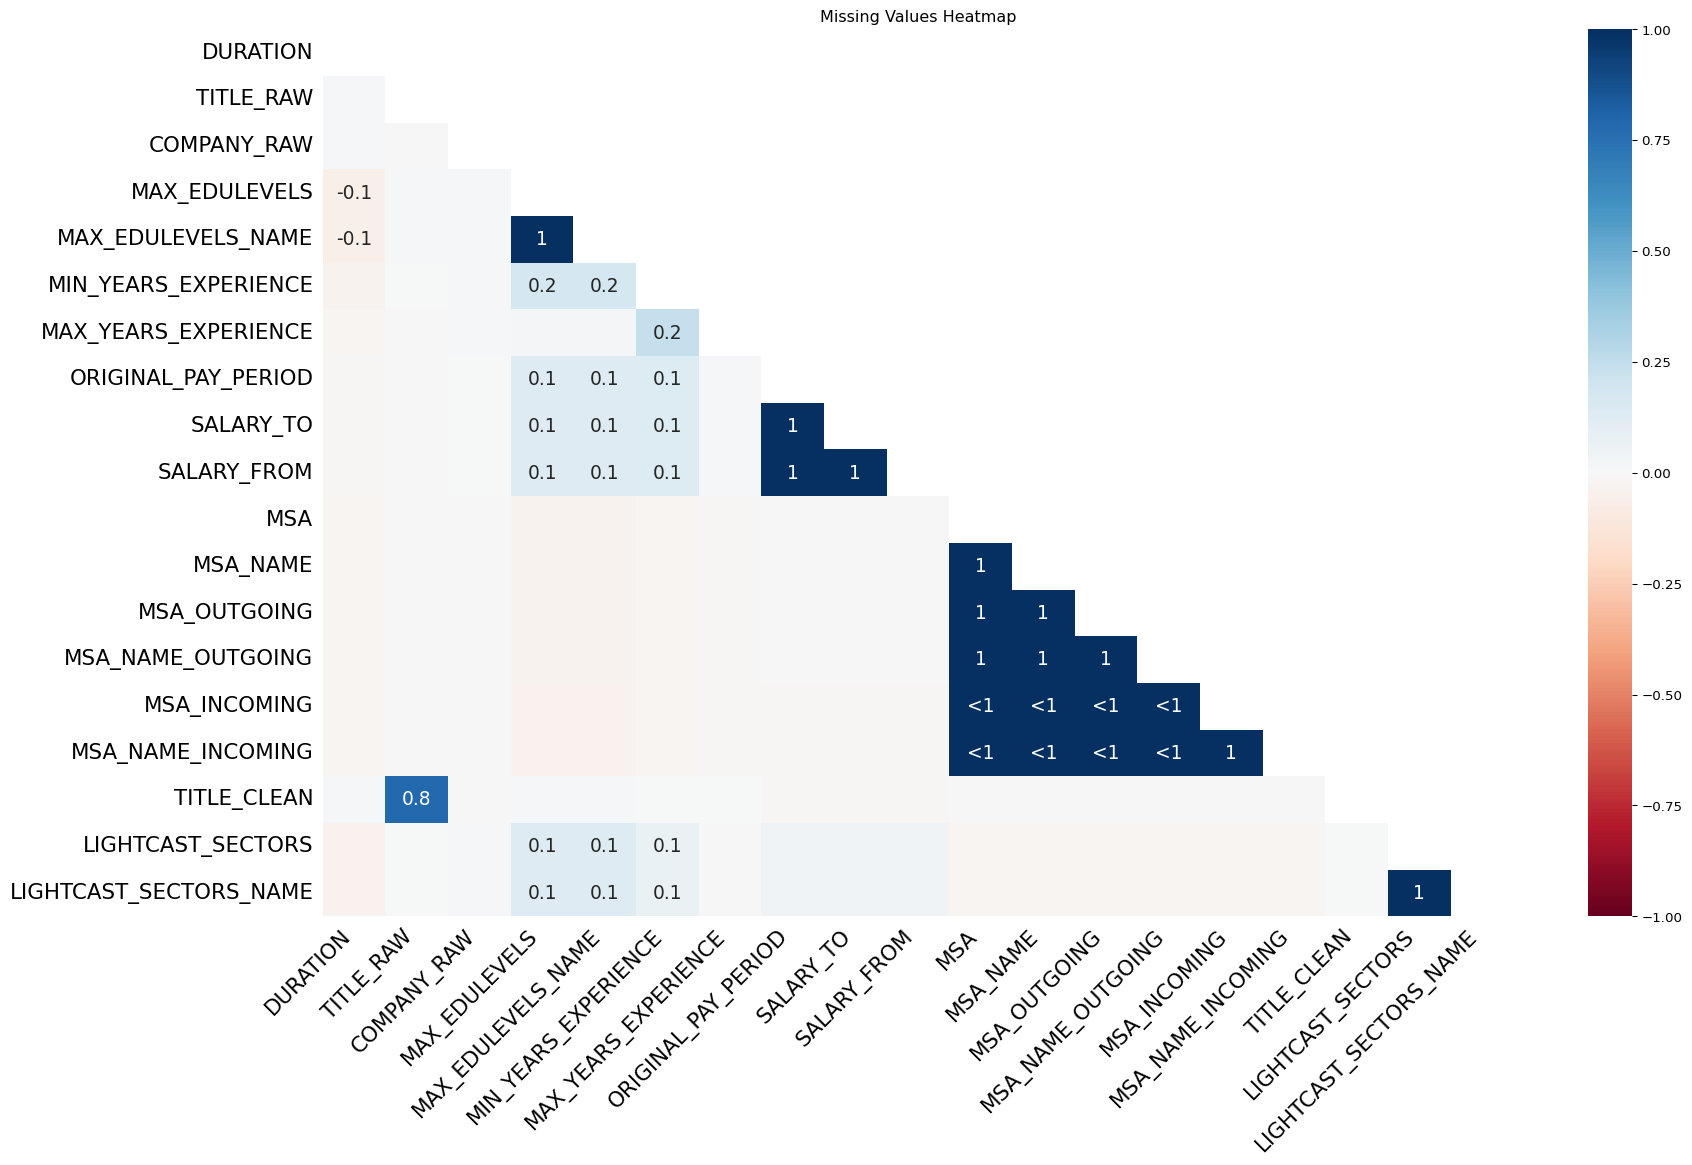

In [4]:
#| echo: true
#| eval: true
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data
msno.heatmap(clean_pdf)
plt.title("Missing Values Heatmap")
plt.show()

fill_cols = ["CITY_NAME", "CITY", "LOCATION", "STATE", "STATE_NAME", "COMPANY", "COMPANY_NAME"]
clean_pdf[fill_cols] = clean_pdf[fill_cols].fillna("Unknown")

clean_pdf = clean_pdf.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

clean_pdf.dropna(thresh=len(clean_pdf)*0.5, axis=1, inplace=True)


In [5]:
#New Column to Classify AI Jobs and Add Month of Posting Date


ai_keywords = [
    "AI", "Machine Learning", "Data Scientist", "Data Analyst", "ML", 
    "Artificial Intelligence", "Deep Learning", "NLP", "Predictive Analytics"
]

#Function to classify AI vs Non-AI Jobs
def classify_ai(title):
    title_lower = str(title).lower()
    for keyword in ai_keywords:
        if keyword.lower() in title_lower:
            return "AI"
    return "Non-AI"

clean_pdf["AI_JOB"] = clean_pdf["TITLE_RAW"].apply(classify_ai)

clean_pdf["POSTED"] = pd.to_datetime(clean_pdf["POSTED"], errors="coerce")
clean_pdf["POSTED_MONTH"] = clean_pdf["POSTED"].dt.month

#clean_pdf.head(25)

Top 10 States by AI Job Growth:
       STATE_NAME AI_JOB      GROWTH
20         Hawaii     AI  140.217803
100       Wyoming     AI   90.990260
50        Montana     AI   67.291667
46    Mississippi     AI   58.393822
80   South Dakota     AI   46.527778
34      Louisiana     AI   41.077075
32       Kentucky     AI   40.737045
2          Alaska     AI   40.043290
52       Nebraska     AI   38.870132
86           Utah     AI   36.988636

Top 10 States by Non-AI Job Growth:
                                  STATE_NAME  AI_JOB     GROWTH
101                                  Wyoming  Non-AI  50.555556
21                                    Hawaii  Non-AI  49.105634
97                             West Virginia  Non-AI  43.492753
67                              North Dakota  Non-AI  32.006313
81                              South Dakota  Non-AI  31.818182
47                               Mississippi  Non-AI  28.331625
57                             New Hampshire  Non-AI  25.913029
51          

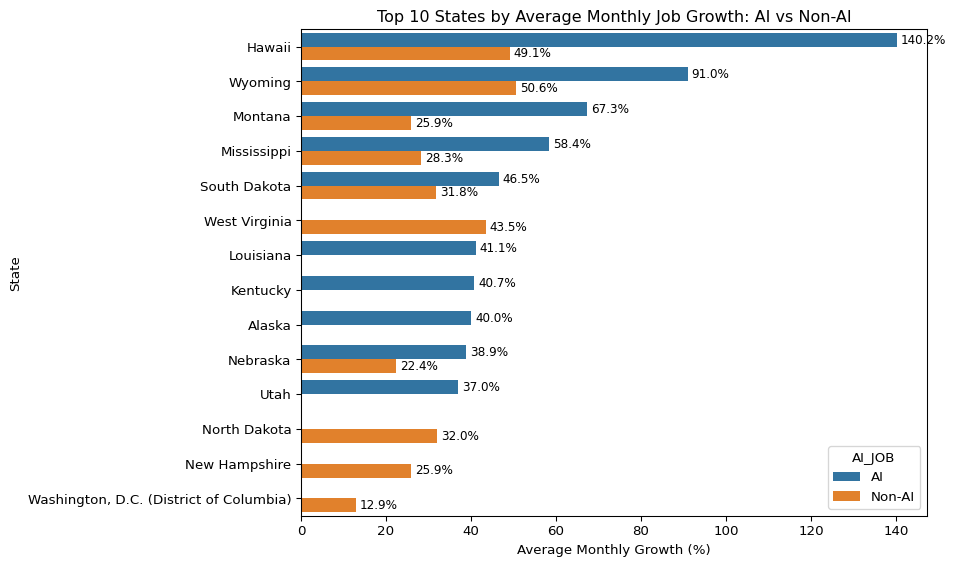

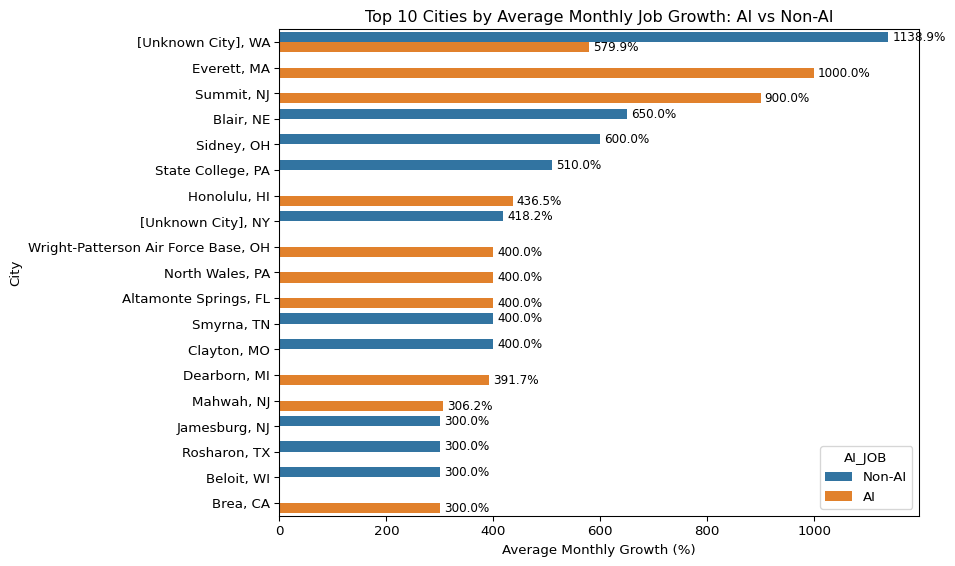

In [6]:
#Question 1 Visualization: Which Cities or States have the highest job growth for AI vs Non-AI

count_by_month_state = (
  clean_pdf.groupby(["STATE_NAME", "POSTED_MONTH", "AI_JOB"])
  .size()
  .reset_index(name="count")
)

count_by_month_city = (
  clean_pdf.groupby(["CITY_NAME", "POSTED_MONTH", "AI_JOB"])
  .size()
  .reset_index(name="count")
)

#Measure job growth by State and then by city
count_by_month_state = count_by_month_state.sort_values(["STATE_NAME", "AI_JOB", "POSTED_MONTH"])
count_by_month_state["GROWTH"] = (
  count_by_month_state
  .groupby(["STATE_NAME", "AI_JOB"])["count"]
  .pct_change() * 100
)

count_by_month_city = count_by_month_city.sort_values(["CITY_NAME", "AI_JOB", "POSTED_MONTH"])
count_by_month_city["GROWTH"] = (
  count_by_month_city
  .groupby(["CITY_NAME", "AI_JOB"])["count"]
  .pct_change() * 100
)

avg_growth_state = (
    count_by_month_state.groupby(["STATE_NAME", "AI_JOB"])["GROWTH"]
    .mean()
    .reset_index()
    .dropna()
    .sort_values("GROWTH", ascending=False)
)

avg_growth_city = (
    count_by_month_city.groupby(["CITY_NAME", "AI_JOB"])["GROWTH"]
    .mean()
    .reset_index()
    .dropna()
    .sort_values("GROWTH", ascending=False)
)

print("Top 10 States by AI Job Growth:")
print(avg_growth_state[avg_growth_state["AI_JOB"] == "AI"].head(10))

print("\nTop 10 States by Non-AI Job Growth:")
print(avg_growth_state[avg_growth_state["AI_JOB"] == "Non-AI"].head(10))

print("Top 10 Cities by AI Job Growth:")
print(avg_growth_city[avg_growth_city["AI_JOB"] == "AI"].head(10))

print("\nTop 10 Cities by Non-AI Job Growth:")
print(avg_growth_city[avg_growth_city["AI_JOB"] == "Non-AI"].head(10))

import matplotlib.pyplot as plt
import seaborn as sns

state_visual = avg_growth_state.groupby("AI_JOB").head(10)

plt.figure(figsize=(10,6))
ax_state = sns.barplot(data=state_visual, y="STATE_NAME", x="GROWTH", hue="AI_JOB")
plt.title("Top 10 States by Average Monthly Job Growth: AI vs Non-AI")
plt.xlabel("Average Monthly Growth (%)")
plt.ylabel("State")

for container in ax_state.containers:
  ax_state.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3, fontsize=9)

plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/top10state.png", dpi=300)
plt.show()

city_visual = avg_growth_city.groupby("AI_JOB").head(10)

plt.figure(figsize=(10,6))
ax_city = sns.barplot(data=city_visual, y="CITY_NAME", x="GROWTH", hue="AI_JOB")
plt.title("Top 10 Cities by Average Monthly Job Growth: AI vs Non-AI")
plt.xlabel("Average Monthly Growth (%)")
plt.ylabel("City")

for container in ax_city.containers:
  ax_city.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3, fontsize=9)

plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/top10city.png", dpi=300)
plt.show()


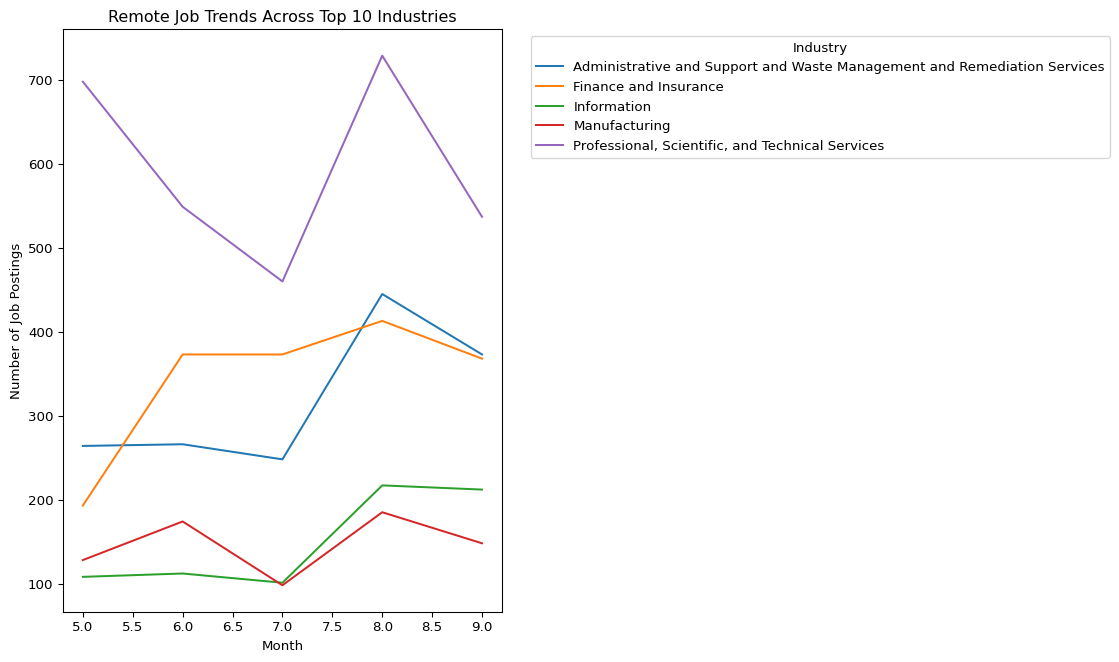

In [7]:
#Question 2: Are remote jobs increasing or decreasing across industries?

remote_only = clean_pdf[clean_pdf["REMOTE_TYPE_NAME"] == "Remote"]

remote_growth = (
  remote_only.groupby(["NAICS_2022_2_NAME", "POSTED_MONTH"])
  .size()
  .reset_index(name="count")
)


top_5_industries = (
  remote_only["NAICS_2022_2_NAME"]
  .value_counts()
  .head(5)
  .index
)

top_remote_growth = remote_growth[remote_growth["NAICS_2022_2_NAME"].isin(top_5_industries)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=top_remote_growth,
    x="POSTED_MONTH",
    y="count",
    hue="NAICS_2022_2_NAME"
)
plt.title("Remote Job Trends Across Top 10 Industries")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/remoteindustries.png", dpi=300)
plt.show()

In [8]:
#Question #3: Do Tech hubs (Silicon Valley, Austin, Boston) still dominate hiring, or are other locations emerging?

tech_hubs = ["Austin-Round Rock-Georgetown, TX", "Boston-Cambridge-Newton, MA-NH","Los Angeles-Long Beach-Anaheim, CA","San Diego-Chula Vista-Carlsbad, CA","San Francisco-Oakland-Berkeley, CA","San Jose-Sunnyvale-Santa Clara, CA","Seattle-Tacoma-Bellevue, WA"]

# Create a column classifying if the city is a tech hub
clean_pdf["TECH_HUB"] = clean_pdf["MSA_NAME"].apply(
    lambda x: "Tech Hub" if x in tech_hubs else "Other"
)

#Count number of postings by Tech Hub
tech_hub_counts = (
  clean_pdf.groupby("MSA_NAME")
  .size()
  .reset_index(name="count")
  .sort_values("count", ascending=False)
)

# Merge to add TECH_HUB classification to each MSA
tech_hub_counts = tech_hub_counts.merge(
    clean_pdf[["MSA_NAME", "TECH_HUB"]].drop_duplicates(),
    on="MSA_NAME",
    how="left"
)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(
    data=tech_hub_counts.head(15),
    x="MSA_NAME",
    y="count",
    hue="TECH_HUB",
    palette="viridis"
)
plt.title("Top 15 Metro Areas by Count of Job Postings")
plt.xlabel("Tech Hub")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=60, ha="right")

# Add labels on top of bars
for i, row in tech_hub_counts.head(15).iterrows():
    plt.text(row["count"] + 100, i, f"{row['count']:,}", va="center", fontsize=10)

#plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/top15techhubs.png", dpi=300)
plt.show()


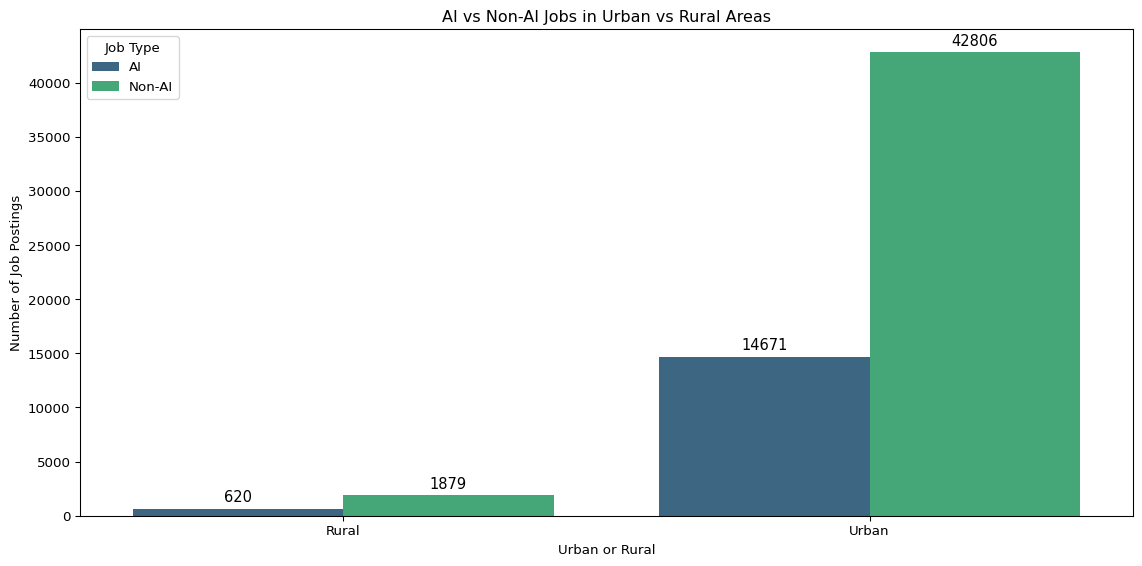

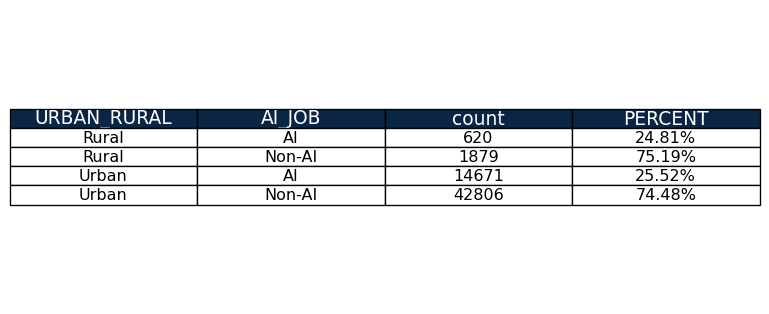

In [9]:
# Question 4: How do Urban vs. Rural Job markets differ for AI and non-AI careers?

# Classify as 'Urban' if MSA_NAME is present, else 'Rural'
clean_pdf["URBAN_RURAL"] = clean_pdf["MSA_NAME"].apply(lambda x: "Urban" if pd.notnull(x) else "Rural")

# Group data by month, urban/rural, and AI vs Non-AI
urban_rural_jobs = (
    clean_pdf.groupby(["URBAN_RURAL", "AI_JOB"])
    .size()
    .reset_index(name="count")
)

#Calculate percentages
urban_rural_jobs["PERCENT"] = (
  urban_rural_jobs.groupby("URBAN_RURAL")["count"]
  .apply(lambda x: 100 * x / x.sum())
  .values
)

#Convert Percentage into 2 decimal places

urban_rural_jobs["PERCENT"] = urban_rural_jobs["PERCENT"].apply(lambda x:f"{x:.2f}%")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax_urban = sns.barplot(
    data=urban_rural_jobs,
    x="URBAN_RURAL",
    y="count",
    hue="AI_JOB",
    palette="viridis"
)

plt.title("AI vs Non-AI Jobs in Urban vs Rural Areas")
plt.xlabel("Urban or Rural")
plt.ylabel("Number of Job Postings")
plt.legend(title="Job Type")

for container in ax_urban.containers:
  ax_urban.bar_label(container, fmt="%d", label_type="edge", padding=3, fontsize=11)
plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/urbanai.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(7,4))  
ax.axis('off') 

table = ax.table(
    cellText=urban_rural_jobs.values,
    colLabels=urban_rural_jobs.columns,
    cellLoc='center',
    loc='center',
    colColours=["#0b2545"]*len(urban_rural_jobs.columns),  # Dark blue header
    colWidths=[0.3]*len(urban_rural_jobs.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2) 

for key, cell in table.get_celld().items():
  if key[0] == 0:
    cell.set_fontsize(14)
    cell.set_text_props(color='white')
    cell.set_facecolor('#0b2545')

plt.show()